# **BUSI 488 / COMP 488 Data Science in the Business World**
## *Spring 2023*  
Daniel M. Ringel  
Kenan-Flagler Business School  
*The University of North Carolina at Chapel Hill*  
dmr@unc.edu

## Class 14 - Business Applications: *Loan Eligibility Prediction with Tree-Based Models*

*February 28, 2023*  
Version 2.0

# Today's Agenda
**Today's Business Problem: A Fintech for Loan Eligibility Prediction**
1. **Dataset on Loan Eligibility**
2. **Introduction to Decision Trees**
3. **Numerical Example of a Classification Tree**
4. **Classification Tree in Action: Predicting Loan Eligibility**
5. **Regression Tree**


## Prep-Check:
- Reviewed Notebook from Class 13

# Today's Business Problem: A FinTech for Loan Eligibility Prediction


![RoboLoan](https://www.open.edu/openlearn/pluginfile.php/3277516/tool_ocwmanage/articletext/0/wall-e-large.jpg)

###**A Fintech wants to automate the loan approval process in real-time...** 
###**...based on information that applicants provide about themselves online.**  

1. What is the ***value*** of such automation?
  - To the start-up
  - To its client
  - To the applicant

2. What would a great ***product*** (or service) look like?
  - From the client's perspective
  - From the consumers' perspective

3. What ***problem*** needs to be solved?

4. What a potential ***pitfalls***?

5. What ***data*** would the start-up require to solve the problem?



# 1. Dataset: ***Loan Eligibility and Applicant Information***

[*Based on an Analytics Vidhya practice competition*](https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/)

A Fintech wants to automate the loan eligibility process (in real time) based on the details that applicants provide in their online application. These details are:

- Gender
- Marital Status
- Education
- Number of Dependents
- Income
- Loan Amount
- Credit History and others. 

To automate this process, the Fintech needs to assign applicants to either being eligible for the requested loan (amount), or not. You are provided with a training dataset in which the loan eligibility is marked. 
The dataset contains the following variables:

| Variable          	| Description                     	|
|-------------------	|---------------------------------	|
| Loan_ID           	| Unique Loan ID                  	|
| Gender            	| Male/ Female                    	|
| Married           	| Applicant married (Y/N)         	|
| Dependents        	| Number of dependents            	|
| Education         	| Graduate/ Under Graduate        	|
| Self_Employed     	| Self employed (Y/N)             	|
| ApplicantIncome   	| Applicant income                	|
| CoapplicantIncome 	| Coapplicant income              	|
| LoanAmount        	| Loan amount in thousands        	|
| Loan_Amount_Term  	| Term of loan in months          	|
| Credit_History    	| credit history meets guidelines 	|
| Property_Area     	| Urban/ Semi Urban/ Rural        	|
| Loan_Status       	| Loan approved (Y/N)             	|

You can download the dataset ***loan_train.csv*** from CANVAS along with the notebook of this class.

## 1.1 Load and Explore the Data

In [128]:
# 1. Connect out notebook with out Google Drive and navigate to the directory in which we saved the data file(s)

from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/488/Class14

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/488/Class14


In [129]:
!ls # special shell command to view the files in the home directory of the notebook environment (! command has no lasting effect)

488_2023_Class14.ipynb	auto.csv  loan_train.csv


**A note on shell commands in python notebooks:** The difference between **!** and **%**

- **!** calls out to a shell (in a new process), 
- **%** affects the process associated with the notebook (or the notebook itself)
- many **%** commands have no shell counterpart.

***!cd foo***, by itself, has no lasting effect, since the process with the changed directory immediately terminates.

***%cd foo*** changes the current directory of the notebook process, which is a lasting effect.

In [130]:
# 2. import some libraries that you will need for this step
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# 3. import the data file
data_train = pd.read_csv("loan_train.csv") # parse to a Pandas DataFrame using pd.read_csv()

# 4. Output the first 10 rows --> What do you observe?
data_train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [131]:
# 5. Let's get some descriptives
data_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


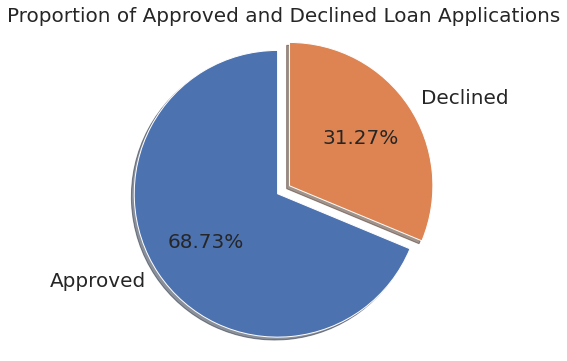

In [132]:
# 6. How many loan request were approved vs declined?
labels = 'Approved', 'Declined'
sizes = [data_train.Loan_Status[data_train['Loan_Status']=='Y'].count(), data_train.Loan_Status[data_train['Loan_Status']=='N'].count()]
explode = (0, 0.1)

fig1, ax1 = plt.subplots(figsize=(8, 6))
ax1.pie(sizes, explode=explode, labels=labels,  autopct='%1.2f%%', textprops={'fontsize': 20},
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of Approved and Declined Loan Applications", size = 20)
plt.rcParams['font.size'] = 18  # makes label size bigger

plt.show()

In [133]:
# 7. We could also look at counts for individual features
print(data_train['Gender'].value_counts())

Male      489
Female    112
Name: Gender, dtype: int64


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

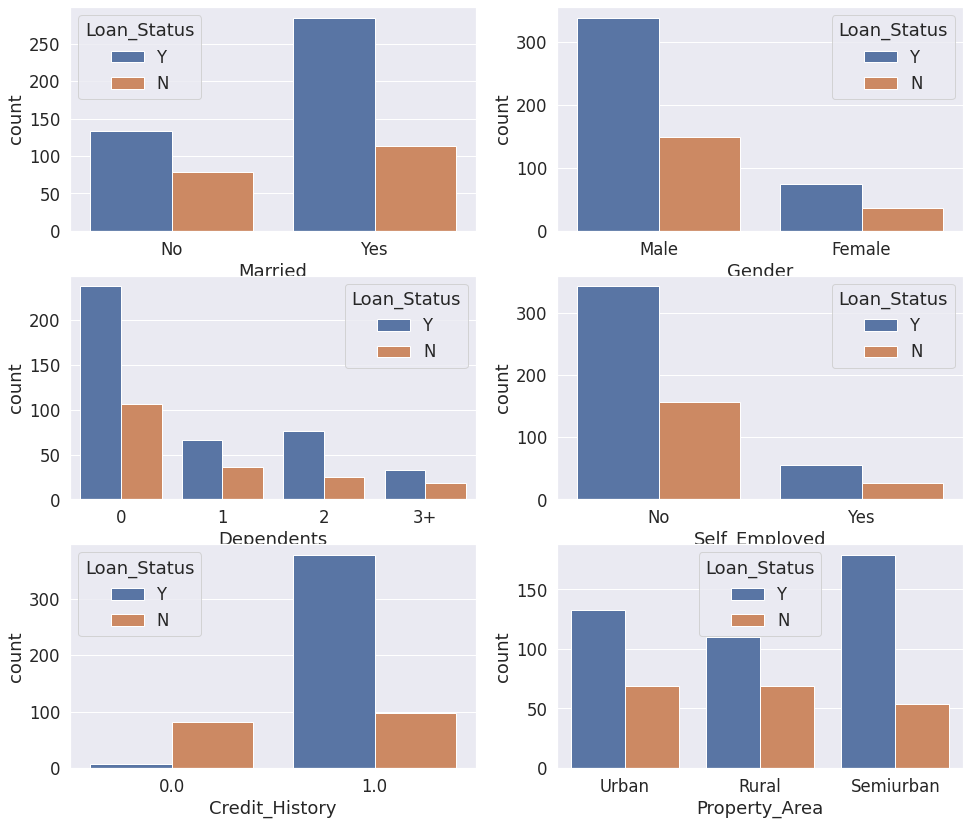

In [134]:
# 8. Let's create barcharts that show frequencies of approve vs. decline by categorical variable 
fig, axarr = plt.subplots(3, 2, figsize=(16, 14))
sns.countplot(x='Married', hue = 'Loan_Status',data = data_train, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Loan_Status',data = data_train, ax=axarr[0][1])
sns.countplot(x='Dependents', hue = 'Loan_Status',data = data_train, ax=axarr[1][0])
sns.countplot(x='Self_Employed', hue = 'Loan_Status',data = data_train, ax=axarr[1][1])
sns.countplot(x='Credit_History', hue = 'Loan_Status',data = data_train, ax=axarr[2][0])
sns.countplot(x='Property_Area', hue = 'Loan_Status',data = data_train, ax=axarr[2][1])

## 1.2 Preprocess the Data

In [135]:
# 1. The first column (Loan_ID) is not informative to our task. So let's drop it!
data_train=data_train.drop(['Loan_ID'],axis=1)
data_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [136]:
# 2. It's good practice to typecast categorical variables as such. 
# 2a. Fist, check again what type they are
print(data_train.dtypes)

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


In [137]:
# 2b. Make your work easy: Automatically identify which features are numeric and which are categorical. 
# To do so, create two indices that hold the colum names of our data set that are numerical and categorical, respectively
# Make sure that you do not include our response variable here, since this is just about features!
numeric_features = data_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data_train.select_dtypes(include=['object', 'category']).drop(['Loan_Status'], axis=1).columns

display(numeric_features)
display(categorical_features)

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')

In [138]:
# 2c. What about Credit_History? Should that not be a categorical variable?
numeric_features=numeric_features.drop('Credit_History')
categorical_features=categorical_features.insert(6, 'Credit_History') 

display(numeric_features)
display(categorical_features)

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term'],
      dtype='object')

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Credit_History'],
      dtype='object')

In [139]:
# 5. Now typecast all variables that are categorical as type "category"
for col in categorical_features.tolist():
        data_train[col] = data_train[col].astype('category')

In [140]:
# 6. Don't forget to also typecast our response variable as category
data_train['Loan_Status'] = data_train['Loan_Status'].astype('category')   

In [141]:
# 7. Check if it worked
print(data_train.dtypes)

Gender               category
Married              category
Dependents           category
Education            category
Self_Employed        category
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History       category
Property_Area        category
Loan_Status          category
dtype: object


In [142]:
# 8. What about Dependents? Should that not be an int64? List the unique values of Dependents. What do you see?
print(data_train.Dependents.unique())

['0', '1', '2', '3+', NaN]
Categories (4, object): ['0', '1', '2', '3+']


In [143]:
# 9. What about Missing Data?
print(data_train.isnull().sum())

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [144]:
# 10. Let's impute the missing data with an imputer, for instance the SimpleImputer from sklearn
from sklearn.impute import SimpleImputer

# 10a. Now you need to impute missing numerical values. What imputation strategy will you choose?
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
imputer = imputer.fit(data_train[numeric_features.tolist()])
data_train[numeric_features.tolist()] = imputer.transform(data_train[numeric_features.tolist()])

# 10b. Now you need to impute missing categorical values. 
imputercat = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
data_train[categorical_features] = imputercat.fit_transform(data_train[categorical_features.tolist()])
data_train['Credit_History'] = data_train['Credit_History'].astype('category')   # imputer set type back to numeric, so we correct it again

# 10c. Check if you resolved all missing values
print(data_train.isnull().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


## 1.3 Prepare Data for Machine Learning

In [145]:
# 1. Create a new dataframe X that includes only our feature variables
X = data_train.loc[:, data_train.columns != 'Loan_Status']

# 2. Create a new dataframe y that includes only our
y = data_train.Loan_Status

In [146]:
# 3. Now you need to one hot encode the categorical features to make them machine readable. 
X = pd.get_dummies(X,drop_first = True)
display(X.head())


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban
0,5849.0,0.0,128.0,360.0,1,0,0,0,0,0,0,1,0,1
1,4583.0,1508.0,128.0,360.0,1,1,1,0,0,0,0,1,0,0
2,3000.0,0.0,66.0,360.0,1,1,0,0,0,0,1,1,0,1
3,2583.0,2358.0,120.0,360.0,1,1,0,0,0,1,0,1,0,1
4,6000.0,0.0,141.0,360.0,1,0,0,0,0,0,0,1,0,1


In [147]:
# 4. And re-code the response variable using a dictionary and replace
repmap={"Y": 1, "N": 0}
y.replace(repmap, inplace=True)
display(y.head())

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

## 1.4 Feature engineering

Sometimes there is an opportunity to create new, meaningful features from existing ones. Similar to financial performance indicators such as P/E ratio or the ROI.

1. In our dataset, there are features for applicant income and co-applicant income. Together, these should be **"household income"**. 

2. Another metric that we don't have in our data is equated monthly installment (**EMI**).
    * EMI is a fixed payment amount made by a borrower to a lender at a specified date each calendar month. 
    * EMIs are used to pay off both interest and principal each month so that over a specified number of years, the loan is paid off in full. 
    * In common loans such as real estate mortgages, auto loans, and student loans, the borrower makes fixed periodic payments to the lender over the course of several years with the goal of retiring the loan.  
    
    * EMI reducing-balance method = (Principal + Total Interest) / Loan Amount Term = P x r x ((1 + r)^n)/((1 + r)^n - 1) where:
        * P is the principal amount borrowed
        * r = I/12 is the periodic monthly interest rate
        * n is the total number of monthly payments      
    * Assuming an average interest rate of 6% for 30 years (**why 30 years?**) - which is about right, and precisely wrong - we calculate EMI from our features as follows: 

  >    $r = 0.06/12$ 
    
  > $\text{EMI}=\frac{\textit{LoanAmount}\times 1000 \times r \times (1+r)^{\textit{LoanAmountTerm}}}{(1+r)^{\textit{LoanAmountTerm}}  - 1}$


    
**Calculate both new features, household income and EMI, below:** 

In [148]:
# 1. Feature engineer Household_Income and add it to our features (X)
X['Household_Income']=X.ApplicantIncome + X.CoapplicantIncome
# Alternatively, take the log. Why?
#X['Household_Income']=np.log(X.ApplicantIncome + X.CoapplicantIncome)

# 2. Feature engineer EMI and add it to our features (X)
r = 0.06/12
X['EMI']=np.ceil(X['LoanAmount']*1000*r*((1+r)**X['Loan_Amount_Term'])/((1+r)**X['Loan_Amount_Term']-1)*100)/100

# 3. Append our two new features to our index of numerical features
numeric_features = numeric_features.append(pd.Index(['EMI','Household_Income_log']))

# 4. Take a look
X[['LoanAmount','Loan_Amount_Term','Household_Income', 'EMI']]

,LoanAmount,Loan_Amount_Term,Household_Income,EMI
0,128.0,360.0,5849.0,767.43
1,128.0,360.0,6091.0,767.43
2,66.0,360.0,3000.0,395.71
3,120.0,360.0,4941.0,719.47
4,141.0,360.0,6000.0,845.37
...,...,...,...,...
609,71.0,360.0,2900.0,425.69
610,40.0,180.0,4106.0,337.55
611,253.0,360.0,8312.0,1516.87
612,187.0,360.0,7583.0,1121.16


### 1.5 Let's train a basic model: K-Nearest Neighborhood (KNN)

In [149]:
# 1. Import from the sklearn library a function to split our data into a training and a testing sample,
#    the KNN Classifier
#    and a scoring metric
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 2. Create a training and a test sample from the full data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 3. Instantiate the KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=5)

# 4. Fit the model
knn.fit(X_train, y_train)


# 5. Make the prediction for the test set
y_pred_knn = knn.predict(X_test)


# 6. Check Accuracy of prediction
print(f"Accuracy of Predicition (KNN): {round(accuracy_score(y_test, y_pred_knn)*100,2)}%")

Accuracy of Predicition (KNN): 62.16%


#### ***Maybe a different model can do better? Let's try a Decision Tree!***

# 2. Introduction to Decision Trees

- One of the easiest and most popular classification algorithms to understand and interpret 
- Can be utilized for both classification and regression problems
- Also referred to as **CART** (**C**lassification **a**nd **R**egression **T**ree)


### Basic Idea
- Learns to partition (split into groups) based on the feature values 
- Recursive partitioning 
- Flowchart-like structure mimics human thinking (sequence of if-else questions). 
- Visualization facilitates interpretation of results

### Advantage: "Clear Box" type ML Algorithm
- Known internal decision-making logic (not available in, for example, Neural Networks)
- Faster than many other algorithms
- Time complexity is a function of the number of records and the number of features
- Distribution-free and non-parametric method (does not depend upon probability distribution assumptions)
- Can handle high dimensional data with good accuracy

### Building Blocks of a Decision Tree
- Essentially a Flowchart-like structure consisting of a hierarchy of nodes
- Nodes are questions or predictions about a particular feature
- Multiple elements make up a decision tree:
    - **Root Node** is the starting point
    - **Internal Node** represents a feature
    - **Leaf Node** represents an outcome
    - **Branch** represents a decision rule
    - branches connect **Parent Nodes** with (their) **Child Nodes**

![DecisionTree](https://mapxp.app/BUSI488/DecisionTree.jpg)


***Summary:***
- Root: no parent node, question giving rise to two children nodes.
- Internal node: one parent node, question giving rise to two children nodes.
- Leaf: one parent node, no children nodes --> prediction.

![Parent-Child](https://mapxp.app/BUSI488/ParentChild.jpg)




## 2.1 Let's Start by Building a Classification Tree
- Input: Training data with class labels (supervised learning)
- Objective: infer class labels for new samples 
    - Each sample follows a sequence of if-else questions about individual features
- Able to capture non-linear relationships between features and labels
- Does *not* require feature scaling (e.g., Standardization, Min-Max)
- Key concept: purity of labeled Sample Set at a Node, defined below
![Node Impurity](https://mapxp.app/BUSI488/Impurity.jpg)

### 2.1.1 Algorithm
1. Consider a Node with a labeled Samples set.  *Initially, this is the root node with all training data.* 
2. IF the samples are *pure* (or another *stopping rule* applies) 
3. THEN make the Node a Leaf, and record the majority class label as the prediction, and STOP
4. ELSE Create two child nodes 
5. Select a decision rule on a feature $f$ to partition the Sample Set into two child sets, minimizing the sum of the child node impurities (*maximize information gain*)
6. Record the feature and rule parameters in the Node, then recursively consider each child with its sample set.


### 2.1.2 Stopping Rules
   - leaf node is pure
   - a maximal node depth is reached
   - splitting a note does not lead to an information gain
   - early stopping criterion reached (e.g., minimum impurity decrease is reached)

### 2.1.3 Splitting Criterion
**Splitting criterion:** Information Gain (IG) based on sum of node impurities  
**Objective function:** Maximize IG at each split, equiv. minimize the impurity criterion

![ContiniousSplit](https://mapxp.app/BUSI488/SplitPoint.jpg)


### 2.1.4 Attribute (Feature) Selection Measures

- An attribute selection measure (ASM) is a heuristic for selecting the splitting criterion that partition data into the best possible manner.  
- An ASM is also known as a splitting rule because it helps us to determine breakpoints for the decision rule at a given node. 
- An ASM ranks each feature in regard to how well it can explain the outcome (response).
- The best feature is selected for the split, and recorded in the node.
    - continuous-valued feature, the split threshold is also recorded.

**We will use Information Gain with Gini impurity to split our data**

#### 2.1.4.1 Information Entropy measures impurity
Claude Shannon invented the concept of *information entropy*, which can measures the impurity of an input set. 
- In physics and mathematics, entropy is a measure of the randomness or disorder in a system. 
- In information theory, *entropy* is a measure of how much more information we need to know to make an accurate prediction.  
- Consider classifying that a point is blue for the two sample sets in the picture below. 
   - Pure: We need no extra information to correctly predict blue. Entropy=0.
   - Impure: We can predict blue and be right 9/15 times, but would need more information to get all predictions correct.  Entropy=0.971.
   - Informally, think of entropy here as the level of suprise:  0=no surprise, 1=it's a tossup.
   - For completeness (That is, we won't test you on this), if $b$ is the number of blue, and $n$ the number of points, entropy is $-\log_2(b/n)-\log_2((n-b)/n)$. 
![Node Impurity](https://mapxp.app/BUSI488/Impurity.jpg)

#### 2.1.4.2 Information Gain (IG) measures improvement in purity
*Information gain (IG)* is the decrease in entropy (or another measure for impurity). 
- IG computes the difference between total entropy of parent and total entropy at the children, averaged over all samples. 
- IG = information needed before splitting (at parent) — information neede after splitting (at children), weighted by number of samples.

**A loose definitions is:**
IG = information before splitting (at parent) — information after splitting (at children)  


**Formal definition:**. 

- $IG(S,f)$: Information Gain for labeled sample set $S$ when splitting by feature $f$.
- $I(S)$: impurity measure for training sample set $S$
- $|S|$: number of samples in training set $S$
- $S_{\text{left}}$: training sample set of the left child after splitting $S$ by $f$
- $S _{\text{right}}$: training sample set of the right child after splitting $S$ by $f$

$$IG(S, f) = I(S) - \frac{|S _{\text{left}}|}{|S|} I(S _{\text{left}}) - \frac{|S _{\text{right}}|}{|S|} I(S_{\text{right}})$$

### 2.1.5 Impurity measures: entropy, misclassification, Gini

In addition to entropy, there are other measures for impurity available, including **misclassification error** (probability of error when assigning the class with the plurality), and **Gini impurity** (the chance of mislabelling by applying a random label from the sample to a random sample point). 

Here are the definitions for all three when $C$ is the set of class labels.
- $p(c|S)$: proportion of the samples of $S$ that belongs to class $c$
- $I_H(S)$ entropy of a labeled sample set $S$
- $I_M(S)$ misclassification in a sample set $S$ when predicting a label with a plurality. 
- $I_G(S)$ Gini impurity of a labeled sample set $S$

Entropy: $I_H(S) = - \sum_{p(c|S)>0} p(c | S) \log_2 p(c|S)$

Misclassification: $I_M(S) =  1 - \max_{c\in C}\{{p(c|S)}\}$$

Gini: $I_G(S) =  \sum_{c\in C} p(c |S) \big(1-p(c |S)\big) = 1-\sum_{c\in C} p(c |S)^2 $


*We can make these and plot for two-class classification: think of a biased coin that is heads with probability $p\in [0,1]$.* 

<AxesSubplot:>

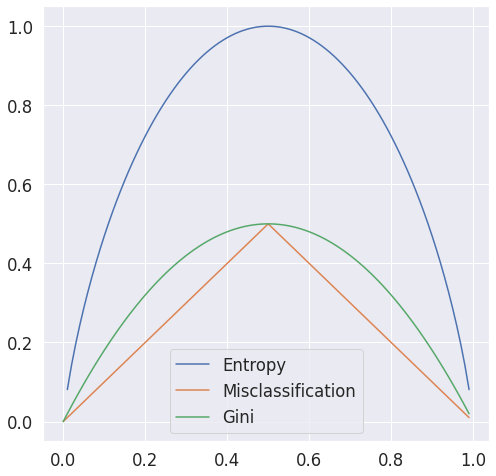

In [150]:
# 1. Import some libraries
import numpy as np
import pandas as pd

# 2. Define functions that calculate impurity
def gini(p):
    return (p)*(1 - (p)) + (1-p)*(1 - (1-p))

def misclerror(p):
    return 1 - np.max([p, 1-p])

def entropy(p):
    return - p*np.log2(p) - (1 - p)*np.log2((1 - p))

# 3. Visualize impurity measures for different values of p
x = np.arange(0.0, 1.0, 0.01)

impuritydf = pd.DataFrame({'Entropy':  [entropy(p) if 0<p<1 else None for p in x],
                           'Misclassification' : [misclerror(p) for p in x],
                           'Gini' : [gini(p) for p in x]}, index = x)
impuritydf.plot(figsize=(8,8))


# 3. Numerical Example of a Classification Tree

What if we wanted to predict the churn of banking customers?
  - What might a Classification Tree (why classification tree?) possibly look like?

***Here is a (theoretical) possiblity (for the sole purpose of explaining the concept!)***

![ExampleTree](https://mapxp.app/BUSI488/DecisionTreeExample.jpg)


## How was this tree built using Information Gain (IG) and the Gini Index? 

### 1. Start by finding the root node (we assume 500 customers and three features for this numerical example)
   
#### 1.1 Map out the three features (FICO Score, Platinum Card, Bank Tenure) and relate them to the response variable (Churn)

![FindingRootNode](https://mapxp.app/BUSI488/FindingRootNode.jpg)

#### 1.2 Now calculate the Information Gain (IG) for each feature (if we were to split the data by a given feature)
*I will do the calculation by hand by example of the FICO Score below*  

**FIRST** we need to calculate the node impurity of the FICO Score Node using the Gini Index.   
 
 
 The Gini Index is essentially:   
 
 $$Gini =  1-\sum_{i =1}^{C}p_i^2$$



![CalculateImpurity](https://mapxp.app/BUSI488/CalculateImpurity.jpg)


**SECOND** we can calculate the Information Gain
![CalculateIG](https://mapxp.app/BUSI488/CalculateIG2.jpg)

**We can now select our root node: FICO Score**

### 2. We can split the children of our Root Node further
***Either by another feature, or AGAIN by FICO Score!***  

![2ndSplit](https://mapxp.app/BUSI488/2SplitFICO.jpg)

**What do you see from this second split?**

### 3. Is a third split of FICO worth it?
***We can split FICO futher - but does this make much sense?***  

![3rdSplit](https://mapxp.app/BUSI488/3SplitFICO.jpg)

- It does not seem to be very helpful to split FICO a 3rd time. 
- But we could continue splitting the data... 
- SciKit-Learn provides us with a metric that can help us define when to stop splitting nodes

#### Minimum Impurity Decrease 
*A node will be split of this split induces a decrease of the impurtiy greater or equal to this value.*
We can set a threshold for when to stop splitting nodes! 

***We calculate the (weighted) impurity decrease as follows:***

![MID](https://mapxp.app/BUSI488/MID.jpg)


### You can find the above calcualtions for our numerical example using Python at the end of this notebook!

# 4. Classification Tree in Action: Predicting Loan Eligibility

Let's see how well a classification tree does in predicting loan eligibility!

In [151]:
# 1. Import DecisionTreeClassifier, Train-Test-Split, and Accuracy Score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 2. Split dataset into 70% train, 30% test
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# 3. Instantiate dt, set 'criterion' to 'gini'
dt = DecisionTreeClassifier(criterion='gini', random_state=1)

# 4. Fit dt to the training set
dt.fit(X_train,y_train)

# 5. Predict test-set labels
y_pred_dt = dt.predict(X_test)

# 6. Evaluate Performance
print(f"Accuracy of Predicition (K-NN): {round(accuracy_score(y_test, y_pred_knn)*100,2)}%")
print(f"Accuracy of Predicition (Decision Tree): {round(accuracy_score(y_test, y_pred_dt)*100,2)}%")

Accuracy of Predicition (K-NN): 62.16%
Accuracy of Predicition (Decision Tree): 72.43%


## 4.1 Visualize the Decision Tree

The nice thing about Decision Trees is that we can now look into them to see what features are being split and how!

In [152]:
# You might need to uncomment this line if running the notebook locally. It should be unnecessary on colab.
#!conda install python-graphviz --yes

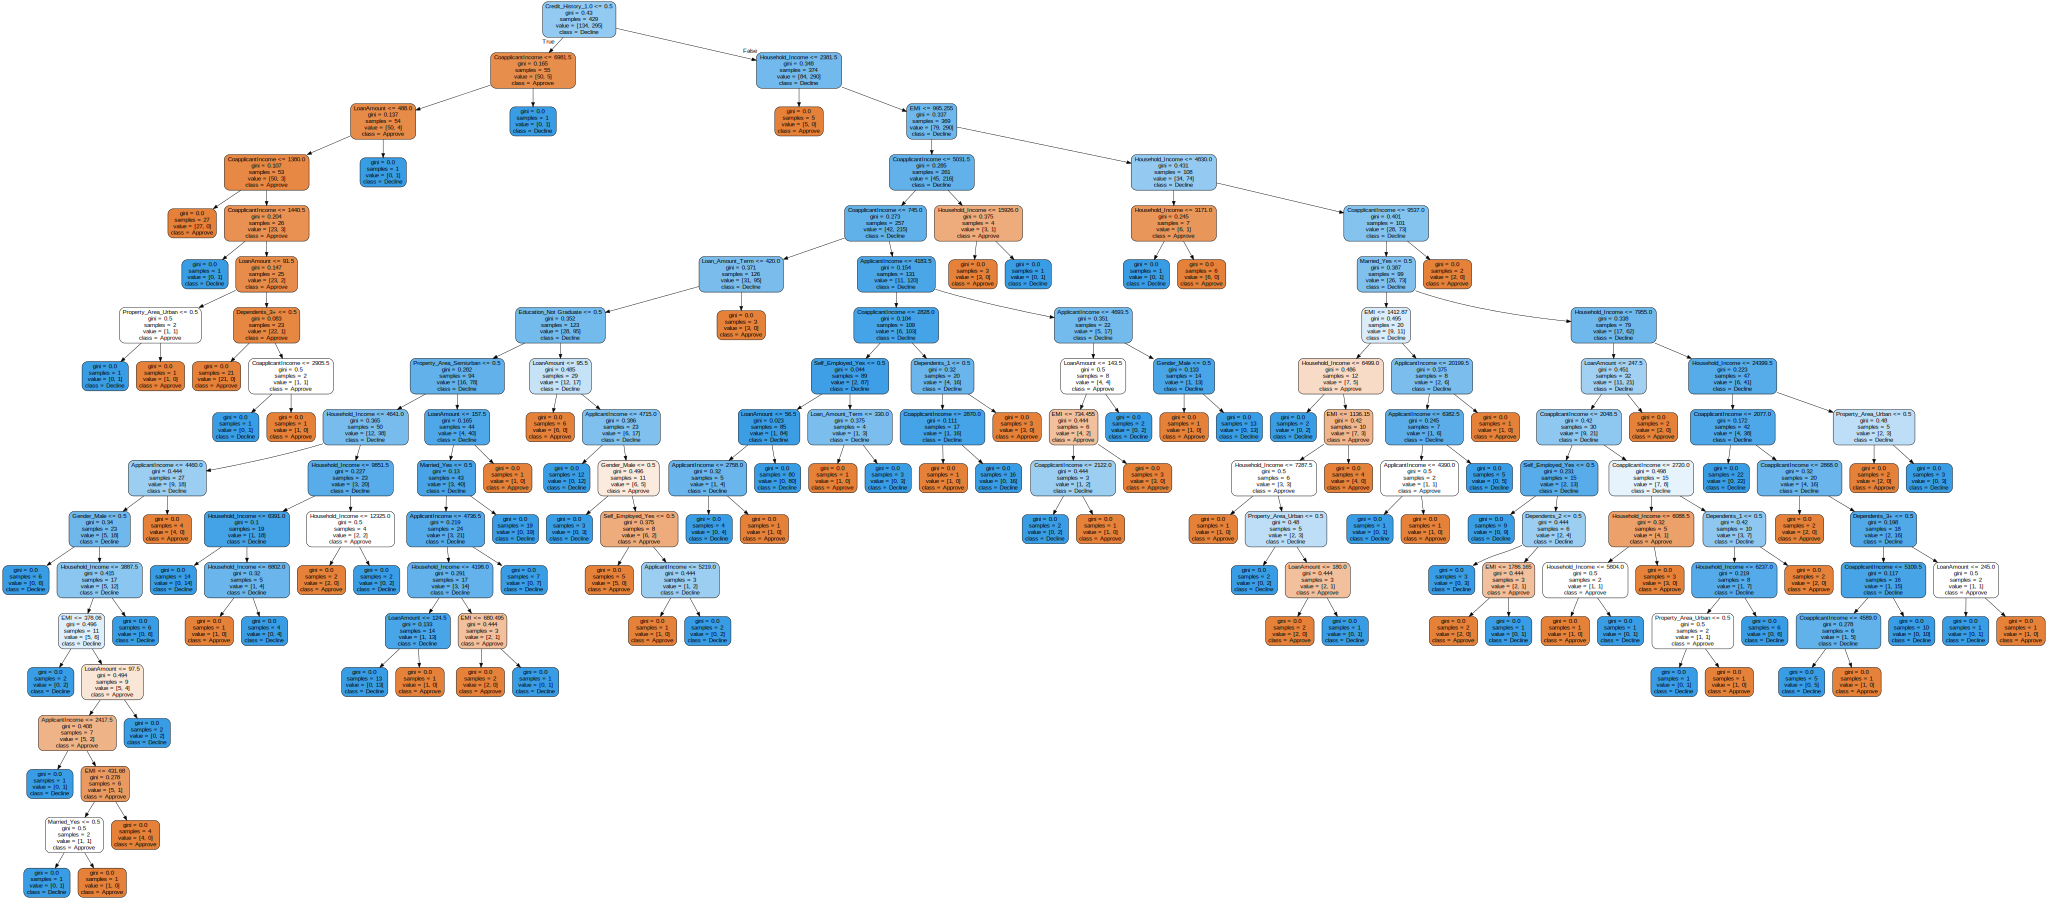

In [153]:
# Static Image
from sklearn.tree import export_graphviz
from IPython.display import SVG
from sklearn import tree
from graphviz import Source
from IPython.display import display

# Let's visualize it!

# class labels
features = X_train.columns.to_list()

# generate the graph
graph = Source(tree.export_graphviz(dt, out_file=None
              ,feature_names=features, class_names=['Approve', 'Decline'] 
              ,rounded=True
              ,filled = True))

#display the graph
display(SVG(graph.pipe(format='svg')))

### 4.5.1 Interactive Visualization and Estimation

In [154]:
# You might need to uncomment this line if running the notebook locally. It should be unnecessary on colab.
#!conda install -c conda-forge ipywidgets --y

In [155]:
#Interactive
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display                               
from ipywidgets import interactive

# class labels
features = X_train.columns.to_list()

'Function that plots our tree'
def plot_tree(crit, depth=5, min_leaf=10, MID=0):
    estimator = DecisionTreeClassifier(random_state = 1 
      , criterion = crit
      , max_depth = depth
      , min_samples_leaf=min_leaf
      , min_impurity_decrease=MID)
    estimator.fit(X_train, y_train)
    
    # Extract the final tree for visualization
    #estimator = model.estimators_[-1]
    print(f"Accuracy of this Decision Tree Classifier is {round(accuracy_score(y_test, estimator.predict(X_test))*100,2)}%")
    graph = Source(export_graphviz(estimator
      , out_file=None
      , feature_names=features
      , class_names=['Approve', 'Decline']
      , rounded=True
      , filled = True))
    display(SVG(graph.pipe(format='svg')))
    
    return estimator

# Let's call that plotting function and pass it the parameters (including possible values) that we want to manipulate interactively
inter=interactive(plot_tree 
   , crit = ["gini", "entropy"]
   , depth=[5,10,15]
   , min_leaf=(10,20)
   , MID=(0,0.005,0.001))

# Finally, let's display the interactive tree
display(inter)

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

# 5. Regression Tree

When the decision tree has a continuous target variable. For example, a regression tree would be used for the price of a newly launched product because price can be anything depending on various constraints.

### Similar to Classifcation Tree but uses Regions for Outcomes


**Step 1**: Divide the predictor space (set of possible values for $X_1,...,X_p$) into $J$ distinct and non-overlapping regions ($R_1,...,R_J$).  

**Step 2**: For every record that falls into the region $R_j$, make the same prediction  
           (the mean of the response values for the training recors in $R_j$).
        
**Example:** 
- let's say that in Step 1 we have two regions
- the response mean of the training observations in the first region is 10
- the response mean in the second region is 20

Then for agiven observation $X=x$:
- if $x∈R_1$ predict a value of 10  
- if $x∈R_2$ predict a value of 20

#### Where do the regions come from?

Theoretically, ***regions could have any shape*** in multi-dimensional space (usally higher than 2D or even 3D since we have more than 2-3 features)  

***Divide predictor space*** into high-dimensional "containers" (for simplicity and ease of interpretation of the resulting predictive model).

***Objective:*** Find the containers $R_1,...,R_J$ that minimize the RSS (Residual Sum of Squares) given by:

\begin{equation*}
RSS = \sum_{j=1}^{J} \sum_{i \in R_j} (y_i- \hat{y}_{R_j})^2
\end{equation*}

where $\hat{y}_{R_j}$ the mean response for the training records within the $j^{th}$ container.  

***Computational Expense***

- Computationally infeasible to consider every possible partition of the feature space into $J$ containers
- Take a top-down, *greedy* approach: *recursive binary splitting*
    - Top-down because starts at top of tree (all observations belong to single region) 
    - Successively splits the predictor space
    - Each split creates two new branches further down the tree
    - Greedy because at each step of the tree building process, the best split is made for the *moment*
    - Does not look ahead and picking a split that will lead to a better tree down the road



## 5.1 Let's look at some data on cars and their gas consumtion

In [156]:
# 1. Import Data and take a look
import pandas as pd
filename = "auto.csv"
df = pd.read_csv(filename) # parse to a Pandas DataFrame using pd.read_csv()
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


In [157]:
# 2. Now you need to one hot encode the categorical features to make them machine readable. 
df = pd.get_dummies(df)
print(df.head())

# 3. Create arrays for the features and the response variable
import numpy as np
y = df['mpg'].values
X = df.drop(['mpg'], axis=1).values

print("Response Variable: ",y.shape)
print("Feature Variables: ",X.shape)

    mpg  displ   hp  weight  accel  size  origin_Asia  origin_Europe  \
0  18.0  250.0   88    3139   14.5  15.0            0              0   
1   9.0  304.0  193    4732   18.5  20.0            0              0   
2  36.1   91.0   60    1800   16.4  10.0            1              0   
3  18.5  250.0   98    3525   19.0  15.0            0              0   
4  34.3   97.0   78    2188   15.8  10.0            0              1   

   origin_US  
0          1  
1          1  
2          0  
3          1  
4          0  
Response Variable:  (392,)
Feature Variables:  (392, 8)


### 5.1.1 Instantiate the Regression Tree

In [158]:
# 1. Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# 2. Split data into 70% train and 30% test
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=1)

# 3. Instantiate a DecisionTreeRegressor 'dt'
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.1, random_state=1)

### 5.1.2 Fit and Predict

In [159]:
# 1. Fit 'dt' to the training-set
dt.fit(X_train, y_train)

# 2. Predict test-set labels
y_pred = dt.predict(X_test)

### 5.1.3 Evaluate the Model

- **Mean Squared Error** (MSE)of an estimator measures the average of the squares of the errors. That is, the average squared difference between the estimated values and the actual value.

- **Root Mean Square Error** (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are. RMSE measures how spread out residuals are, that is, how concentrated the data is around the line of best fit.

- **R-squared** (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

In [160]:
# 1. Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score

# 2. Compute test-set MSE
mse_dt = MSE(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse_dt:.2f}')

# 3. Compute test-set RMSE
rmse_dt = mse_dt**(1/2)

# 4. Print rmse_dt
print(f'Root Mean Squared Error (RMSE): {rmse_dt:.2f}')

# 5. Print R-square
print(f'R-squared (R2): {r2_score(y_test, y_pred):.2f}')

Mean Squared Error (MSE): 18.14
Root Mean Squared Error (RMSE): 4.26
R-squared (R2): 0.62


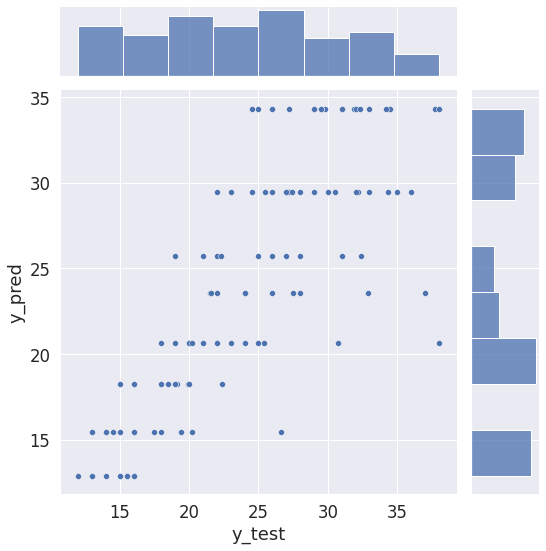

In [161]:
# 5. Let's plot truth vs. predictions for our decision tree regressor
import seaborn as sns
sns.set(font_scale = 1.5)
sns.jointplot(x = 'y_test', y = 'y_pred', data = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred}), height=8)


### 5.1.2 Visualizing the Regression Tree

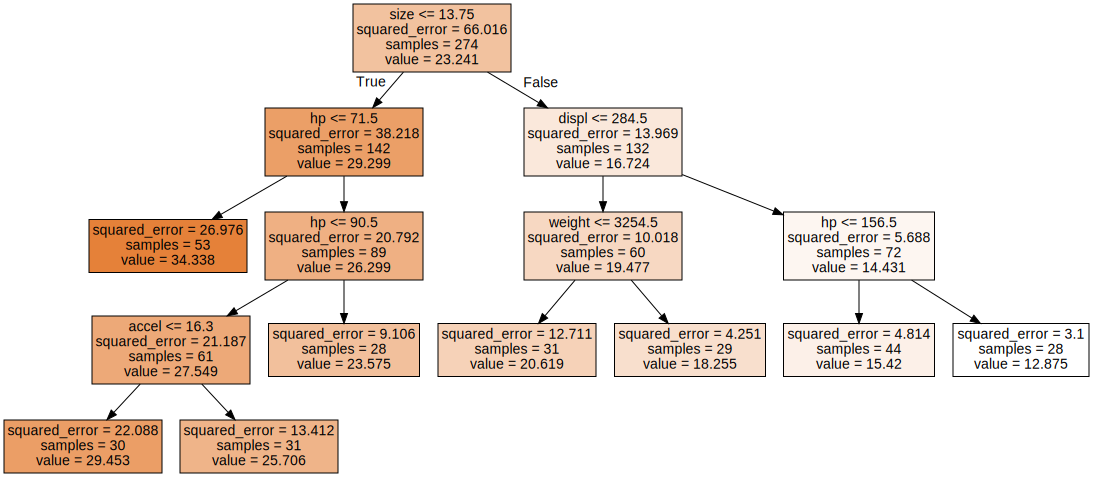

In [162]:
# 1. Import required libraries
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

# 2. code the features so we can see them
features = ['displ', 'hp', 'weight', 'accel', 'size', 'origin_Asia', 'origin_Europe', 'origin_US']

# 3. generate the graph
graph = Source(tree.export_graphviz(dt, out_file=None
   , feature_names=features 
   , filled = True))

# 4. display the graph
display(SVG(graph.pipe(format='svg')))

### 5.1.3 Linear Regression vs. Regression Trees

![CalculateIG](https://mapxp.app/BUSI488/RTvsRegression.jpg)

# **Looking Ahead:**  

####**Next Class:** Thursday, March 2, 2023

#### ***Ensemble Learning:***  
- Bagging
- Random Forests
- Boosting

#### **Reading** before class: none


# **BONUS:** Python Code to calculate numerical example of decision tree

![FindingRootNode](https://mapxp.app/BUSI488/FindingRootNode.jpg)

In [163]:
# put these values in a dataframe, but then unstack the index so decision is across the top
df = pd.DataFrame({'FICO<700': [20, 250, 105, 125], 
                   'PlatinumCardholder': [10, 125, 115, 250],
                   'Tenure<4years': [85, 235, 40, 140]}, 
                  index=pd.MultiIndex.from_tuples([['Y','Y'], ['Y','N'],['N','Y'], ['N','N']] , 
                                                  names=["decision", "churn"]))
# tidy version
#dftidy=pd.melt(df, ignore_index=False, var_name='rule',value_name='count').reset_index()
df = df.unstack('decision')
df.head()

FICO<700      PlatinumCardholder      Tenure<4years     
decision        N    Y                  N    Y             N    Y
churn                                                            
N             125  250                250  125           140  235
Y             105   20                115   10            40   85

In [164]:
# summing over decisions reminds us that the parent impurity doesn't depend on the feature
parents = df.groupby(level=0,axis=1).sum()
sample_n = parents['FICO<700'].sum()
parents.head()

,FICO<700,PlatinumCardholder,Tenure<4years
churn,,,
N,375,375,375
Y,125,125,125


In [165]:
# here is how we can compute gini impurity on a column
def gini_column(c):
  return 1-sum((c/c.sum())**2)

# compute and show parent and child gini impurities for all columns
parent_gini = parents.apply(gini_column, axis=0)
child_gini = df.apply(gini_column, axis=0)
print(parent_gini)
print(child_gini)

FICO<700              0.375
PlatinumCardholder    0.375
Tenure<4years         0.375
dtype: float64
                    decision
FICO<700            N           0.496219
                    Y           0.137174
PlatinumCardholder  N           0.431601
                    Y           0.137174
Tenure<4years       N           0.345679
                    Y           0.390137
dtype: float64


In [166]:
# Here is the fraction of samples for each column and decision
weight = df.sum(axis=0)/sample_n 
weight

                    decision
FICO<700            N           0.46
                    Y           0.54
PlatinumCardholder  N           0.73
                    Y           0.27
Tenure<4years       N           0.36
                    Y           0.64
dtype: float64

In [167]:
# apply the weights
wt_child_gini = weight*child_gini
wt_child_gini

                    decision
FICO<700            N           0.228261
                    Y           0.074074
PlatinumCardholder  N           0.315068
                    Y           0.037037
Tenure<4years       N           0.124444
                    Y           0.249688
dtype: float64

In [168]:
# determine the information gain
InfoGain = parent_gini - wt_child_gini.groupby(level=0).sum()
InfoGain

FICO<700              0.072665
PlatinumCardholder    0.022894
Tenure<4years         0.000868
dtype: float64